In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
%matplotlib inline
from tsGen.temporal import *
from tsGen.samplers import *
from tsGen.catsamplers import *
from tsGen.factory import Factory
from tsGen.ts import realisation
from tsGen.ts import ensemble
import unittest
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
import math
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [3]:
recipe_1 = { 
            'start': '2018-01-01',
            'end': '2018-01-02',
            'delta': '1 h'
         }
ts = TemporalTemplate(recipe_1)

In [4]:
np.random.seed(seed=42)
mu = 1.6
pdf = poisson(mu)
pois =  PDF(pdf)
f2 = Factory(ts,pois)
series = f2.create()
series2 = f2.create()
series3 = f2.create()

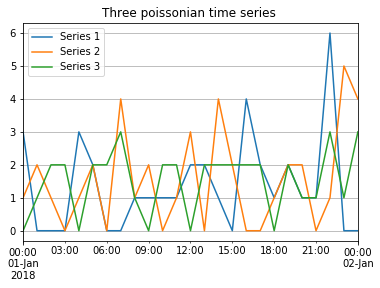

In [5]:
series.plot(label='Series 1')
series2.plot(label='Series 2')
series3.plot(label='Series 3')
plt.title('Three poissonian time series ')
plt.grid()
plt.legend()
plt.show()

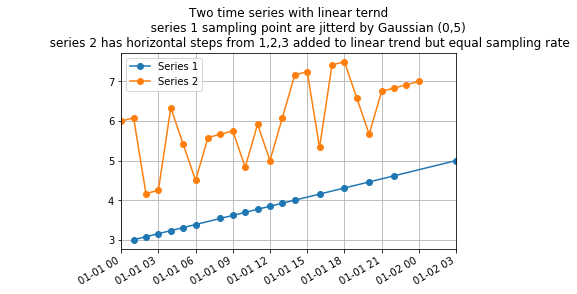

In [6]:
np.random.seed(seed=42)
steps = Step([1,2,3])
func1 = Function(func=lambda params: 2*params['x']+3)
pdf =norm(0,5)  
ts2 = ts + TemporalJitter(pdf,resolution='h')
f3 = Factory(ts2,func1 )
f4 = Factory(ts,func1 +steps)
series = f3.create()
series2 = f4.create()
series.plot( style='-o',label='Series 1')
series2.plot(style='-o',label='Series 2')
plt.title('Two time series with linear ternd\n \
          series 1 sampling point are jitterd by Gaussian (0,5) \n \
          series 2 has horizontal steps from 1,2,3 added to linear trend but equal sampling rate')
plt.grid()
plt.legend()
plt.show()

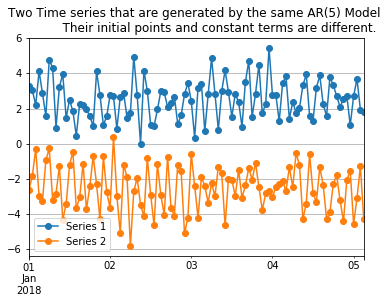

In [7]:
np.random.seed(seed=42)
AR_5_1 = AutoReg(coeffs=[0.10,0.05,0.5,-0.5,0.1],init=[1,2,3,2,1],noise=1.00,const=2.0)
AR_5_2 = AutoReg(coeffs=[0.10,0.05,0.5,-0.5,0.1],init=[1,2,3,2,1],noise=1.00,const=-2.0)
ts2 = TemporalTemplate(dict(start='2018-01-01',length=100,delta='1 h'))
f5_1 = Factory(ts2,AR_5_1)
f5_2 = Factory(ts2,AR_5_2)
series = f5_1.create()
series2 = f5_2.create()
series.plot( style='-o',label='Series 1')
series2.plot( style='-o',label='Series 2')
plt.title('Two Time series that are generated by the same AR(5) Model \n \
           Their initial points and constant terms are different.')
plt.grid()
plt.legend()
plt.show()

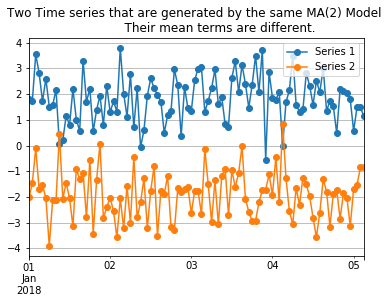

In [8]:
np.random.seed(seed=42)
MA_2_1 = MovingAvg(coeffs=[0.10,0.05],noise=1.00,mean=2.0)
MA_2_2 = MovingAvg(coeffs=[0.10,0.05],noise=1.00,mean=-2.0)
ts3 = TemporalTemplate(dict(start='2018-01-01',length=100,delta='1 h'))
f6_1 = Factory(ts3,MA_2_1)
f6_2 = Factory(ts3,MA_2_2)
series = f6_1.create()
series2 = f6_2.create()
series.plot( style='-o',label='Series 1')
series2.plot( style='-o',label='Series 2')
plt.title('Two Time series that are generated by the same MA(2) Model \n \
           Their mean terms are different.')
plt.grid()
plt.legend()
plt.show()

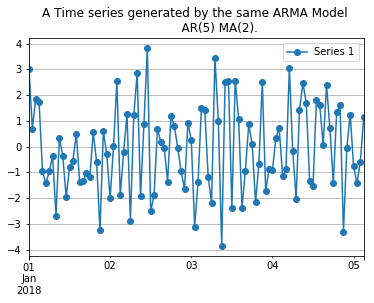

In [9]:
np.random.seed(seed=42)
MA_2_3 = MovingAvg(coeffs=[0.10,0.05],noise=1.00,mean=0.0)
AR_5_3 = AutoReg(coeffs=[0.10,0.05,0.5,-0.5,0.1],init=[1,2,3,2,1],noise=1.00,const=0.0)
ts4 = TemporalTemplate(dict(start='2018-01-01',length=100,delta='1 h'))
f7_1 = Factory(ts4,MA_2_3 + AR_5_3)
series = f7_1.create()
series.plot( style='-o',label='Series 1')

plt.title('A Time series generated by the same ARMA Model \n \
           AR(5) MA(2).')
plt.grid()
plt.legend()
plt.show()

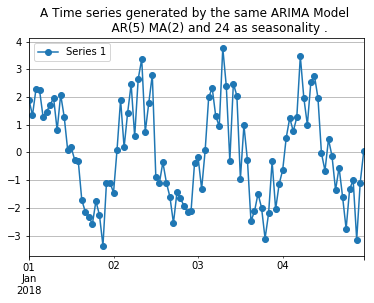

In [10]:
np.random.seed(seed=42)
MA_2_4 = MovingAvg(coeffs=[0.10,0.05],noise=0.50,mean=0.0)
AR_5_4 = AutoReg(coeffs=[0.10,0.05,0.5,-0.5,0.1],init=[1,2,3,2,1],noise=0.50,const=0.0)
sin_sampler = Function(func=lambda params: 2*math.sin(4*2*math.pi*params['x']))
ts5 = TemporalTemplate(dict(start='2018-01-01',length=24*4,delta='1 h'))
f8_1 = Factory(ts5,MA_2_4 + AR_5_4 + sin_sampler)
series = f8_1.create()
series.plot( style='-o',label='Series 1')

plt.title('A Time series generated by the same ARIMA Model \n \
           AR(5) MA(2) and 24 as seasonality .')
plt.grid()
plt.legend()
plt.show()

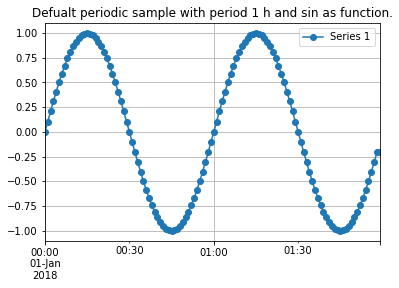

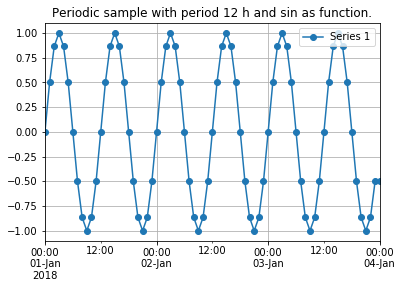

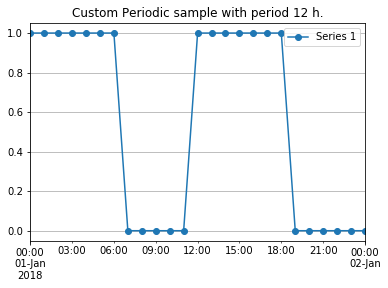

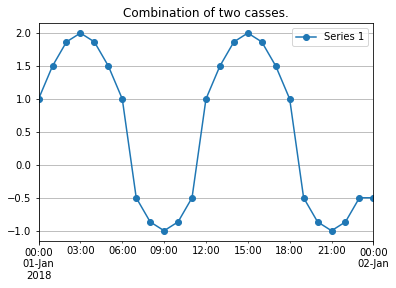

In [11]:
periodic_def = Periodic()
ts6_1 = TemporalTemplate(dict(start='2018-01-01',length=60*2,delta='1 m'))
f9_1 = Factory(ts6_1,periodic_def)

series = f9_1.create()
series.plot( style='-o',label='Series 1')

plt.title('Defualt periodic sample with period 1 h and sin as function.')
plt.grid()
plt.legend()
plt.show()


periodic_12_h = Periodic(period='12 h')
ts6_2 = TemporalTemplate(dict(start='2018-01-01',end='2018-01-04',delta='1 h'))
f9_2 = Factory(ts6_2,periodic_12_h)

series = f9_2.create()
series.plot( style='-o',label='Series 1')

plt.title('Periodic sample with period 12 h and sin as function.')
plt.grid()
plt.legend()
plt.show()


periodic_custom = Periodic(period='12 h',func=lambda x: 1 if(x <= .5) else 0)
ts6_3 = TemporalTemplate(dict(start='2018-01-01',end='2018-01-02',delta='1 h'))
f9_3 = Factory(ts6_3,periodic_custom)

series = f9_3.create()
series.plot( style='-o',label='Series 1')

plt.title('Custom Periodic sample with period 12 h.')
plt.grid()
plt.legend()
plt.show()

f9_4 = Factory(ts6_3,periodic_custom+periodic_12_h)

series = f9_4.create()
series.plot( style='-o',label='Series 1')

plt.title('Combination of two casses.')
plt.grid()
plt.legend()
plt.show()

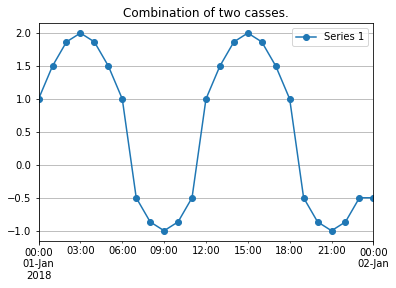

In [24]:
def temporals():
    t1 = TemporalTemplate(dict(start='2018-01-01',end='2018-01-02',delta='1 h'))
    return t1

def samplers():
    periodic_custom = Periodic(period='12 h',func=lambda x: 1 if(x <= .5) else 0)
    periodic_12_h = Periodic(period='12 h')
    return periodic_custom + periodic_12_h

with realisation(temporals,samplers) as series:
    series.plot( style='-o',label='Series 1')
    plt.title('Combination of two casses.')
    plt.grid()
    plt.legend()
    plt.show()
    


In [31]:
def temporals(a,b):
    t1 = TemporalTemplate(dict(start='2018-01-01',end='2018-01-02',delta='1 h'))
    return t1

def samplers(a,b):
    periodic_custom = Periodic(period='12 h',func=lambda x: 1 if(x <= .5) else 0)
    periodic_12_h = Periodic(period='12 h')
    return periodic_custom + periodic_12_h

def labels(series,a,b):
    return 1.0

with ensemble(temporals,
              samplers,
              labels,
              dict(a=[1,2,3],b=[0,1])) as df:
    df


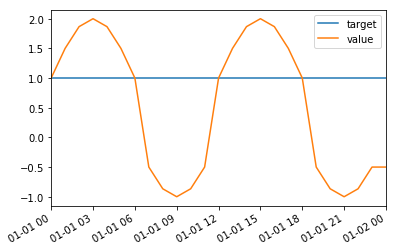

In [33]:
df.plot()